In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

warnings.filterwarnings(action='ignore')

df = pd.read_csv("../data/지역별 일반건강검진 대상 및 수검인원 현황.csv", encoding='cp949')

df.head(10)

,시군구별(1),시군구별(2),성별(1),2018,2018.1
0,시군구별(1),시군구별(2),성별(1),1차검진,1차검진
1,시군구별(1),시군구별(2),성별(1),대상인원 (명),수검인원 (명)
2,계,소계,합계,19593149,15076899
3,계,소계,남자,10393820,8106914
4,계,소계,여자,9199329,6969985
5,서울,소계,합계,3606425,2687536
6,서울,소계,남자,1816207,1353221
7,서울,소계,여자,1790218,1334315
8,서울,종로구,합계,56279,39474
9,서울,종로구,남자,27770,19198


In [394]:
df.isnull().sum()

시군구별(1)    0
시군구별(2)    0
성별(1)      0
2018       0
2018.1     0
dtype: int64

In [395]:
df = df[((df['시군구별(1)'] == '세종') & (df['성별(1)'] == '합계')) | ((df['시군구별(2)'] != '소계') & (df['성별(1)'] == '합계'))]
df = df.replace('소계', '세종')
df['2018'] = df['2018'].astype(float)
df['2018.1'] = df['2018.1'].astype(float)
df

,시군구별(1),시군구별(2),성별(1),2018,2018.1
8,서울,종로구,합계,56279.0,39474.0
11,서울,중구,합계,49032.0,34049.0
14,서울,용산구,합계,81897.0,56632.0
17,서울,성동구,합계,112078.0,82023.0
20,서울,광진구,합계,132608.0,99379.0
...,...,...,...,...,...
785,경남,함양군,합계,15272.0,10996.0
788,경남,거창군,합계,23454.0,17243.0
791,경남,합천군,합계,18870.0,13549.0
797,제주,제주시,합계,171034.0,125389.0


In [396]:
# df = df[(df['시군구별(2)'] != '소계') & (df['성별(1)'] == '합계')]
# df['2018'] = df['2018'].astype(float)
# df['2018.1'] = df['2018.1'].astype(float)

In [397]:
df.shape

(250, 5)

In [398]:
df['수검율'] = df['2018.1'] / df['2018'] * 100

df.head()

,시군구별(1),시군구별(2),성별(1),2018,2018.1,수검율
8,서울,종로구,합계,56279.0,39474.0,70.139839
11,서울,중구,합계,49032.0,34049.0,69.442405
14,서울,용산구,합계,81897.0,56632.0,69.150274
17,서울,성동구,합계,112078.0,82023.0,73.183854
20,서울,광진구,합계,132608.0,99379.0,74.941934


In [399]:
df = df.drop('성별(1)', axis=1)

df.head()

,시군구별(1),시군구별(2),2018,2018.1,수검율
8,서울,종로구,56279.0,39474.0,70.139839
11,서울,중구,49032.0,34049.0,69.442405
14,서울,용산구,81897.0,56632.0,69.150274
17,서울,성동구,112078.0,82023.0,73.183854
20,서울,광진구,132608.0,99379.0,74.941934


In [400]:
df2 = pd.read_csv("../data/지역별 일반건강검진 1차 판정현황.csv", encoding='cp949')

df2.head(5)

,시군구별(1),시군구별(2),성별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6
0,시군구별(1),시군구별(2),성별(1),계(1차 수검인원),정상A,정상B(경계),질환의심,질환의심,질환의심,유질환자
1,시군구별(1),시군구별(2),성별(1),소계,소계,소계,실인원,일반 질환의심,고혈압 당뇨병 질환의심(2차 검진대상자),소계
2,계,소계,합계,15076899,1894966,5050957,4584731,3987020,1347170,3546245
3,계,소계,남자,8106914,650984,2638504,2912435,2533390,923456,1904991
4,계,소계,여자,6969985,1243982,2412453,1672296,1453630,423714,1641254


In [401]:
df2.isnull().sum()

시군구별(1)    0
시군구별(2)    0
성별(1)      0
2018       0
2018.1     0
2018.2     0
2018.3     0
2018.4     0
2018.5     0
2018.6     0
dtype: int64

In [402]:
df2 = df2[((df2['시군구별(1)'] == '세종') & (df2['성별(1)'] == '합계')) | ((df2['시군구별(2)'] != '소계') & (df2['성별(1)'] == '합계'))]
df2 = df2.replace('소계', '세종')
df2['2018'] = df2['2018'].astype(float)
df2['2018.1'] = df2['2018.1'].astype(float)
df2['2018.2'] = df2['2018.2'].astype(float)
df2['2018.3'] = df2['2018.3'].astype(float)
df2['2018.6'] = df2['2018.6'].astype(float)

df2.shape

(250, 10)

In [403]:
df2 = df2.drop(['성별(1)', '2018.4', '2018.5'], axis=1)

df2.head()

,시군구별(1),시군구별(2),2018,2018.1,2018.2,2018.3,2018.6
8,서울,종로구,39474.0,5516.0,13149.0,11706.0,9103.0
11,서울,중구,34049.0,4937.0,10666.0,10423.0,8023.0
14,서울,용산구,56632.0,8640.0,19237.0,16207.0,12548.0
17,서울,성동구,82023.0,11885.0,26418.0,24800.0,18920.0
20,서울,광진구,99379.0,14207.0,32925.0,30319.0,21928.0


In [404]:
df2['이상있음'] = (df2['2018.3'] + df2['2018.6']) / df2['2018']
df2['이상없음'] = (df2['2018.1'] + df2['2018.2']) / df2['2018']

df2.head()

,시군구별(1),시군구별(2),2018,2018.1,2018.2,2018.3,2018.6,이상있음,이상없음
8,서울,종로구,39474.0,5516.0,13149.0,11706.0,9103.0,0.527157,0.472843
11,서울,중구,34049.0,4937.0,10666.0,10423.0,8023.0,0.541749,0.458251
14,서울,용산구,56632.0,8640.0,19237.0,16207.0,12548.0,0.507752,0.492248
17,서울,성동구,82023.0,11885.0,26418.0,24800.0,18920.0,0.533021,0.466979
20,서울,광진구,99379.0,14207.0,32925.0,30319.0,21928.0,0.525735,0.474265


In [405]:
normal_health = pd.DataFrame(df['시군구별(1)'])
normal_health['시군구별(2)'] = df['시군구별(2)'] 
normal_health['수검율'] = df['수검율']
normal_health['이상있음'] = df2['이상있음']
normal_health['이상없음'] = df2['이상없음']
normal_health = normal_health.reset_index(drop=True, col_level = 0)

print(normal_health.head())

normal_health.to_csv("./result/processed_지역별 일반건강검진 결과 판정 현황.csv", index = False, header = False, encoding='utf-8')
normal_health.to_csv("./result/processed_지역별 일반건강검진 결과 판정 현황_header.csv", index = False, encoding='utf-8')

  시군구별(1) 시군구별(2)        수검율      이상있음      이상없음
0      서울     종로구  70.139839  0.527157  0.472843
1      서울      중구  69.442405  0.541749  0.458251
2      서울     용산구  69.150274  0.507752  0.492248
3      서울     성동구  73.183854  0.533021  0.466979
4      서울     광진구  74.941934  0.525735  0.474265


In [406]:
normal_health = pd.read_csv("./result/processed_지역별 일반건강검진 결과 판정 현황_header.csv", encoding='utf-8')

normal_health.head()

,시군구별(1),시군구별(2),수검율,이상있음,이상없음
0,서울,종로구,70.139839,0.527157,0.472843
1,서울,중구,69.442405,0.541749,0.458251
2,서울,용산구,69.150274,0.507752,0.492248
3,서울,성동구,73.183854,0.533021,0.466979
4,서울,광진구,74.941934,0.525735,0.474265


In [407]:
normal_health.groupby(['시군구별(1)', '시군구별(2)']).mean().index

MultiIndex([('강원',    '강릉시'),
            ('강원',    '고성군'),
            ('강원',    '동해시'),
            ('강원',    '삼척시'),
            ('강원',    '속초시'),
            ('강원',    '양구군'),
            ('강원',    '양양군'),
            ('강원',    '영월군'),
            ('강원',    '원주시'),
            ('강원',    '인제군'),
            ...
            ('충북',    '옥천군'),
            ('충북',    '음성군'),
            ('충북',    '제천시'),
            ('충북',    '증평군'),
            ('충북',    '진천군'),
            ('충북', '청주시상당구'),
            ('충북', '청주시서원구'),
            ('충북', '청주시청원구'),
            ('충북', '청주시흥덕구'),
            ('충북',    '충주시')],
           names=['시군구별(1)', '시군구별(2)'], length=250)

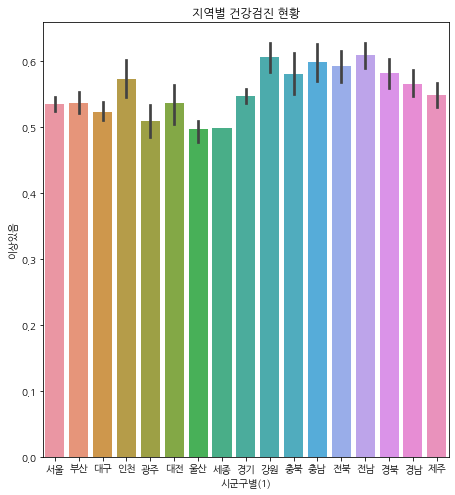

In [409]:
import seaborn as sns

plt.figure(figsize=(16,8))

plt.subplot(121)
sns.barplot(data = normal_health, x = "시군구별(1)", y = "이상있음")
plt.title('지역별 건강검진 현황')

plt.show()

In [410]:
temp = pd.read_csv("../data/시군구별 코드.csv", encoding='utf-8')
temp['SIG_CD'] = temp['SIG_CD'].astype('str')
temp['시군구별(1)'].unique()
temp.head()

,시군구별(1),시군구별(2),SIG_CD
0,서울,NaN,11000
1,서울,종로구,11110
2,서울,중구,11140
3,서울,용산구,11170
4,서울,성동구,11200


In [411]:
normal_health['시군구별(1)'].unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [412]:
merge = pd.merge(temp, normal_health)
merge = merge.sort_values('이상있음', ascending=False)
merge.head()
merge.to_csv("./result/merge.csv", index = False, encoding='utf-8')

In [434]:
import folium
import json

korea_location = [37.563, 126.982]
m = folium.Map(location=korea_location, tiles="OpenStreetMap", zoom_start=7)

geojson_data = None
with open(r'../data/SIG_202101/TL_SCCO_SIG_WGS84.json', encoding='utf-8') as f:
    geojson_data = json.load(f)
    
data = pd.read_csv('./result/merge.csv', encoding='utf-8')
data['SIG_CD'] = data['SIG_CD'].astype('str')

In [424]:
# folium.Choropleth(
#     geo_data = "지도 데이터 파일 경로 (.geojson, geopandas.DataFrame)"
#     data = "시각화 하고자 하는 데이터파일. (pandas.DataFrame)"
#     columns = (지도 데이터와 매핑할 값, 시각화 하고자하는 변수),
#     key_on = "feature.데이터 파일과 매핑할 값",
#     fill_color = "시각화에 쓰일 색상",
#     legend_name = "칼라 범주 이름",
# ).add_to(m)

folium.Choropleth(
    geo_data=geojson_data, data=data,
    columns=['SIG_CD', '이상없음'],
    key_on='feature.properties.SIG_CD',
    fill_color='RdYlBu',
    fill_opacity=0.5,
    reset=True,
    overlay=True
    ).add_to(m)

# m.save(outfile="./result/visualize_health.html")

In [479]:
traffic = pd.read_csv("../data/의료시설 유형별 평균접근시간.csv", encoding='cp949')

traffic.head()

,행정구역별(1),행정구역별(2),시간대별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5
0,행정구역별(1),행정구역별(2),시간대별(1),공공의료시설,공공의료시설,병·의원,병·의원,종합병원,종합병원
1,행정구역별(1),행정구역별(2),시간대별(1),승용차,대중교통/도보,승용차,대중교통/도보,승용차,대중교통/도보
2,전국,소계,일평균(06-20시),8.70,18.61,3.24,9.04,13.11,26.64
3,전국,소계,오전첨두(07-09시),8.60,18.50,3.17,8.79,12.99,26.35
4,전국,소계,낮시간(12-14시),8.65,18.78,3.23,9.28,13.05,27.03


In [480]:
traffic = traffic.rename(columns={'행정구역별(1)':'시군구별(1)', '행정구역별(2)':'시군구별(2)'})
traffic = traffic[((traffic['시군구별(1)']=='세종특별자치시') & (traffic['시간대별(1)']=='일평균(06-20시)')) | ((traffic['시군구별(2)'] != '소계') & (traffic['시간대별(1)'] == '일평균(06-20시)'))]
traffic = traffic.drop('시간대별(1)', axis=1)
traffic.loc[:,'2018':'2018.5'] = traffic.loc[:,'2018':'2018.5'].astype('float')
traffic['교통시간'] = (traffic['2018.1'] + traffic['2018.3'] + traffic['2018.5']) / 3
traffic['자가용시간'] = (traffic['2018'] + traffic['2018.2'] + traffic['2018.4']) / 3
traffic = traffic.drop(['2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5'], axis=1)

In [481]:
traffic = traffic.sort_values('교통시간', ascending=False).reset_index(drop=True, col_level = 0)

traffic['시군구별(1)'] = traffic['시군구별(1)'].replace({
    '서울특별시':'서울',
    '부산광역시':'부산',
    '대구광역시':'대구',
    '인천광역시':'인천',
    '광주광역시':'광주',
    '대전광역시':'대전',
    '울산광역시':'울산',
    '경기도':'경기',
    '강원도':'강원',
    '충청북도':'충북',
    '충청남도':'충남',
    '전라북도':'전북',
    '전라남도':'전남',
    '경상북도':'경북',
    '경상남도':'경남',
    '세종특별자치시':'세종',
    '제주특별자치도':'제주'
})

traffic['시군구별(2)'] = traffic['시군구별(2)'].replace('소계', '세종')

In [482]:
traffic = traffic.append(traffic[traffic['시군구별(2)']=='포항시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='창원시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='창원시'], ignore_index=True)
traffic.loc[132]['시군구별(2)'] = '포항시북구'
traffic.loc[229]['시군구별(2)'] = '포항시남구'
traffic.loc[230]['시군구별(2)'] = '창원시 의창구'
traffic.loc[231]['시군구별(2)'] = '창원시 마산회원구'
traffic.loc[232]['시군구별(2)'] = '창원시 마산합포구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='창원시'], ignore_index=True)
traffic.loc[165]['시군구별(2)'] = '창원시 성산구'
traffic.loc[233]['시군구별(2)'] = '창원시 진해구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='천안시'], ignore_index=True)
traffic.loc[141]['시군구별(2)'] = '천안시동남구'
traffic.loc[234]['시군구별(2)'] = '천안시서북구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='청주시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='청주시'], ignore_index=True)
traffic.loc[145]['시군구별(2)'] = '청주시상당구'
traffic.loc[235]['시군구별(2)'] = '청주시서원구'
traffic.loc[236]['시군구별(2)'] = '청주시흥덕구'
traffic.loc[237]['시군구별(2)'] = '청주시청원구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='전주시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='전주시'], ignore_index=True)
traffic.loc[238]['시군구별(2)'] = '전주시완산구'
traffic.loc[239]['시군구별(2)'] = '전주시덕진구'
traffic.loc[240]['시군구별(2)'] = '전주시효자출장소구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='고양시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='고양시'], ignore_index=True)
traffic.loc[241]['시군구별(2)'] = '고양시덕양구'
traffic.loc[242]['시군구별(2)'] = '고양시일산동구'
traffic.loc[243]['시군구별(2)'] = '고양시일산서구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='용인시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='용인시'], ignore_index=True)
traffic.loc[244]['시군구별(2)'] = '용인시처인구'
traffic.loc[245]['시군구별(2)'] = '용인시기흥구'
traffic.loc[246]['시군구별(2)'] = '용인시수지구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='수원시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='수원시'], ignore_index=True)
traffic.loc[247]['시군구별(2)'] = '수원시장안구'
traffic.loc[248]['시군구별(2)'] = '수원시권선구'
traffic.loc[249]['시군구별(2)'] = '수원시팔달구'
traffic.loc[131]['시군구별(2)'] = '수원시영통구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='안산시'], ignore_index=True)
traffic.loc[149]['시군구별(2)'] = '안산시상록구'
traffic.loc[250]['시군구별(2)'] = '안산시단원구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='안양시'], ignore_index=True)
traffic.loc[182]['시군구별(2)'] = '안양시만안구'
traffic.loc[251]['시군구별(2)'] = '안양시동안구'
traffic = traffic.append(traffic[traffic['시군구별(2)']=='성남시'], ignore_index=True)
traffic = traffic.append(traffic[traffic['시군구별(2)']=='성남시'], ignore_index=True)
traffic.loc[252]['시군구별(2)'] = '성남시수정구'
traffic.loc[253]['시군구별(2)'] = '성남시중원구'
traffic.loc[254]['시군구별(2)'] = '성남시분당구'

In [483]:
traffic_merge = pd.merge(temp, traffic)
traffic_merge.to_csv("./result/traffic_merge.csv", index = False, encoding='utf-8')

In [484]:
m = folium.Map(location=korea_location, tiles="OpenStreetMap", zoom_start=7)

data = pd.read_csv('./result/traffic_merge.csv', encoding='utf-8')
data['교통시간2'] = max(data['교통시간']) - data['교통시간']
data['자가용시간2'] = max(data['자가용시간']) - data['자가용시간']
data['SIG_CD'] = data['SIG_CD'].astype('str')

folium.Choropleth(
    geo_data=geojson_data, data=data,
    columns=['SIG_CD', '교통시간2'],
    key_on='feature.properties.SIG_CD',
    fill_color='RdYlBu',
    fill_opacity=0.5,
    reset=True,
    overlay=True
    ).add_to(m)

# m.save(outfile="./result/visualize_traffic.html")

m.save(outfile="./result/visualize_public_traffic.html")

# m.save(outfile="./result/visualize_overlay.html")